## <font color="blue">Importing packages</font>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Supress Warnings
warnings.filterwarnings('ignore')

In [2]:
## increasing the column view
pd.set_option('display.max_column',999)

<br>
<br>

## <font color="blue">Step 1: Reading and Understanding the Data</font>

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [3]:
df = pd.read_csv("/kaggle/input/boom-bike-dataset/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
df.shape

(730, 16)

In [7]:
### droppping instant & dteday column as its not required for model analysis
df.drop(columns=["instant","dteday"], inplace=True)

In [8]:
### checking null count of each column
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<br>
<br>

## <font color="blue">Step 2: Visualising the Data</font>

Let's now visualise our data using seaborn. We'll first make scatterplot of all the contineous variables present to visualise which variables are most correlated to `cnt`.

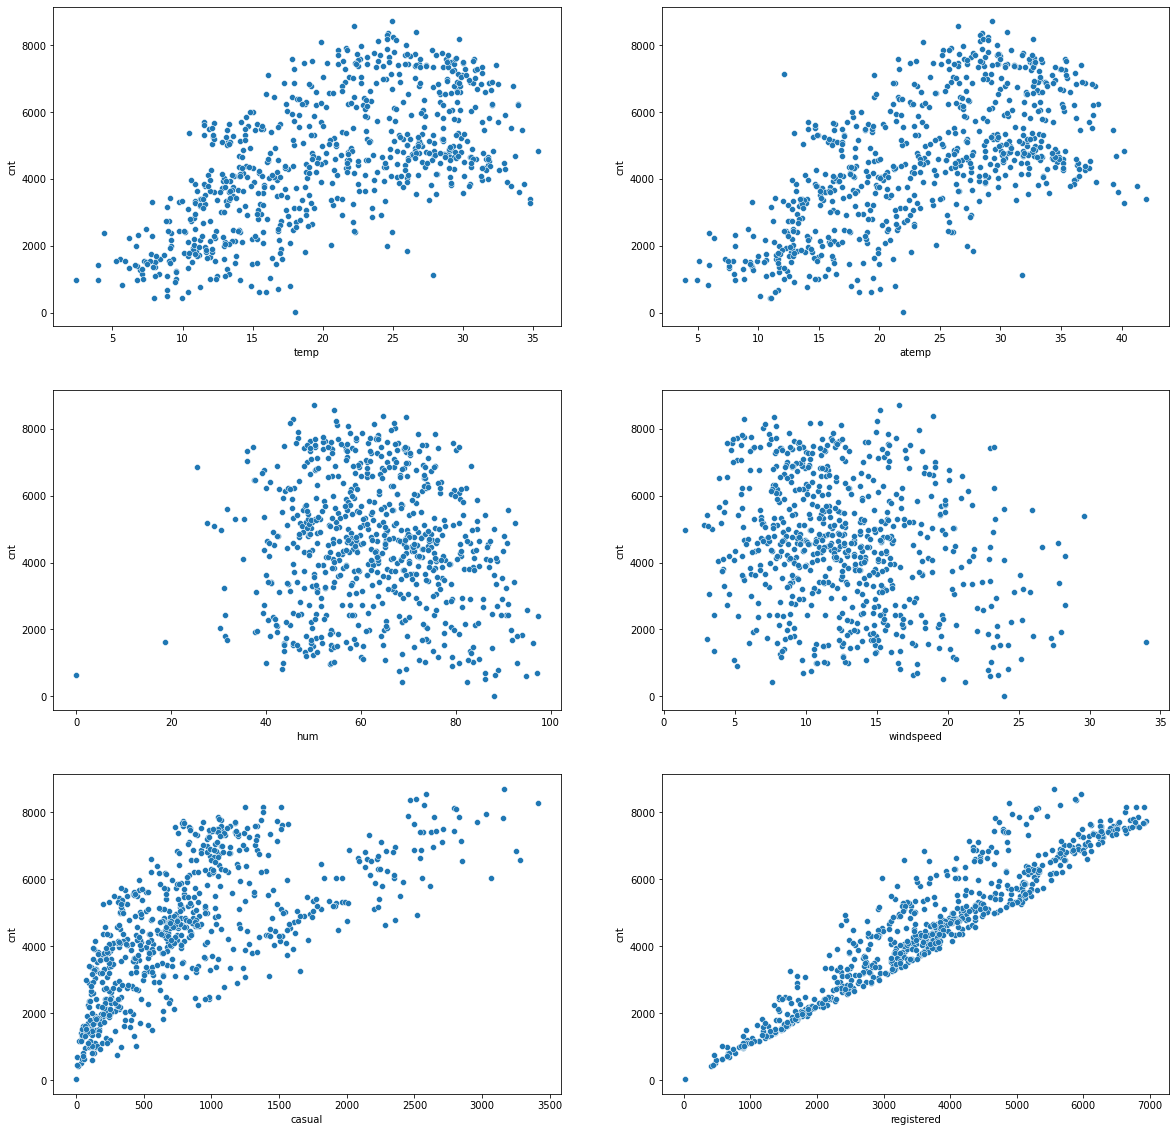

In [9]:
### scatter plot for contineous vars
catvars = ['temp', 'atemp', 'hum','windspeed','casual','registered']
plt.figure(figsize=(20,20))
for i in range(1,len(catvars)+1):
    plt.subplot(3,2,i)
    sns.scatterplot(data=df , y="cnt" , x=catvars[i-1])
    

plt.show() 

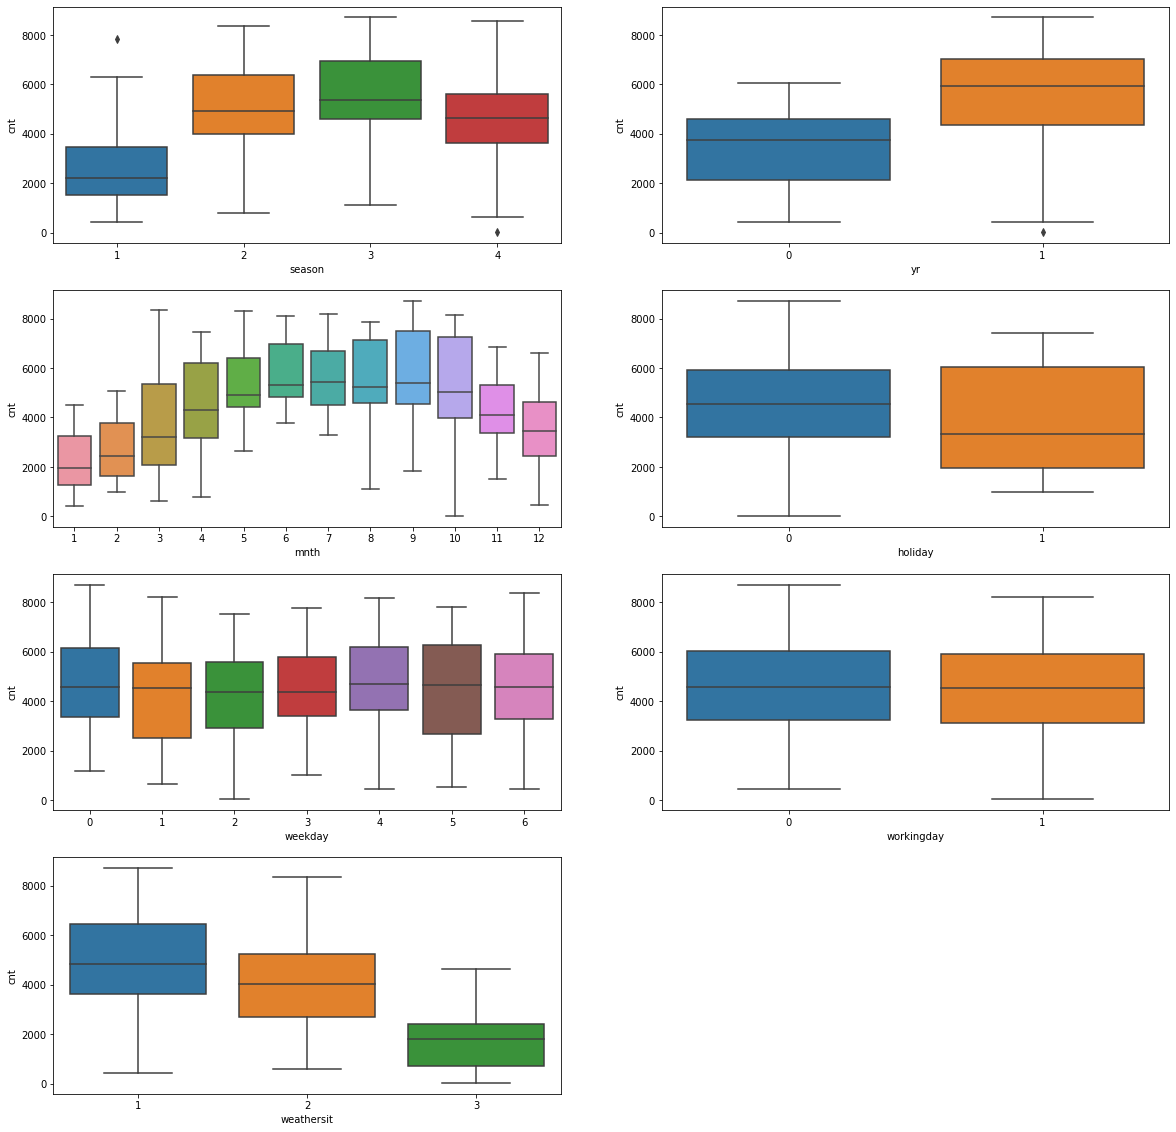

In [10]:
### box plot for categorical vars
catvars = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]
plt.figure(figsize=(20,20))
for i in range(1,len(catvars)+1):
    plt.subplot(4,2,i)
    sns.boxplot(data=df , y="cnt" , x=catvars[i-1])
    

plt.show()    
    
    
# season : season (1:spring, 2:summer, 3:fall, 4:winter)
# yr : year (0: 2018, 1:2019)
# mnth : month ( 1 to 12)
# holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
# weekday : day of the week
# workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
# weathersit : 
#  1: Clear, Few clouds, Partly cloudy, Partly cloudy
#  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog    
    


<br>
<br>

## <font color="blue">Step 3: Data Preparation</font>

1. We need to convert season , mnth , weekday , weathersit into dummy columns as there are categorical variables

2. As yr , holiday and workingday are binary categorical column no need to convert those

In [11]:
## create Dummy for season
## 1. 000 - spring
## 2. 100 - summer
## 3. 010 - fall
## 4. 001 - winter

season = pd.get_dummies(df.season, drop_first=True)

In [12]:
## convert column names 
season.columns = ["Summer","Fall","Winter"]
season.head()

,Summer,Fall,Winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [13]:
#merging the columns into original dataframe and droppping season column
df = pd.concat([df,season] , axis=1)

df.drop(columns="season",inplace=True)
        
df.head() 

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Summer,Fall,Winter
0,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0
1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0
2,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0
3,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0
4,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0


In [14]:
## create Dummy for weekdays
## 0. 000000 - Monday
## 1. 100000 - Tuesday
## 2. 010000 - Wednesday
## 3. 001000 - Thursday
## 4. 000100 - Friday
## 5. 000010 - Saturday
## 6. 000001 - Sunday

weekday = pd.get_dummies(df.weekday , drop_first=True) 

In [15]:
## convert column names 
weekday.columns = ["Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
weekday.head()

,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0


In [16]:
#merging the columns into original dataframe and droppping weekday column
df = pd.concat([df,weekday] , axis=1)

df.drop(columns="weekday",inplace=True)
        
df.head() 

,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Summer,Fall,Winter,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,0,1,0,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0,1,0,0,0,0,0
1,0,1,0,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0,0,1,0,0,0,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0,1,0,0,0
3,0,1,0,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0,0,1,0,0
4,0,1,0,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0,0,0,1,0


In [17]:
## create Dummy for weathersit
## 1. 00 - Clear, Few clouds, Partly cloudy, Partly cloudy
## 2. 10 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
## 3. 01 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

## 4. N.A - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
##(Not Considered as there is no data for this as seen in the box plot)

weathersit = pd.get_dummies(df.weathersit , drop_first=True) 

In [18]:
## convert column names 
weathersit.columns = ["Mist","LightSnow"]
weathersit.head()

,Mist,LightSnow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [19]:
#merging the columns into original dataframe and droppping weathersit column
df = pd.concat([df,weathersit] , axis=1)

df.drop(columns="weathersit",inplace=True)
        
df.head() 

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Summer,Fall,Winter,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Mist,LightSnow
0,0,1,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0,1,0,0,0,0,0,1,0
1,0,1,0,1,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0,0,1,0,0,0,0,1,0
2,0,1,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0,1,0,0,0,0,0
3,0,1,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0,0,1,0,0,0,0
4,0,1,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0,0,0,1,0,0,0


In [20]:
## create Dummy for mnth
## 1. 00000000000 - Jan
## 2. 10000000000 - Feb
## 3. 01000000000 - Mar
## 4. 00100000000 - Apr
## 5. 00010000000 - May
## 6. 00001000000 - June
## 7. 00000100000 - July
## 8. 00000010000 - Aug
## 9. 00000001000 - Sep
## 10. 00000000100 - Oct
## 11. 00000000010 - Nov
## 12. 00000000001 - Dec

mnth = pd.get_dummies(df.mnth , drop_first=True)

In [21]:
## convert column names 
mnth.columns = ["Feb","Mar","Apr","May","June","July","Aug","Sep","Oct","Nov","Dec"]
mnth.head()

,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [22]:
#merging the columns into original dataframe and droppping mnth column
df = pd.concat([df,mnth] , axis=1)

df.drop(columns="mnth",inplace=True)
        
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Summer,Fall,Winter,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Mist,LightSnow,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec
0,0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
## As yr is already a binary categorical column , just converting the column name to the year will be helpful
df = df.rename(columns={"yr":"2019"})

df.head()

,2019,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Summer,Fall,Winter,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Mist,LightSnow,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec
0,0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<br>

## <font color="blue">Step 4: Splitting the Data into Training and Testing Sets</font>

As you know, the first basic step for regression is performing a train-test split.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
df_train,df_test = train_test_split(df , train_size=0.7 ,test_size=0.3, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 32)
(219, 32)


<br>
<br>

## <font color="blue">Step 5: Rescaling the Features </font>

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
### rescaling temp , atemp , hum , windspeed , casual , registered , cnt
scale_feature = ["temp" , "atemp" , "hum" , "windspeed" , "casual" , "registered","cnt"]

In [28]:
scaler = MinMaxScaler()

In [29]:
df_train[scale_feature] = scaler.fit_transform(df_train[scale_feature])
df_train.head()

,2019,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Summer,Fall,Winter,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Mist,LightSnow,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.280402,0.951776,0.864243,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [30]:
### checking the impact of scaling on the train set
df_train.describe()

,2019,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Summer,Fall,Winter,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Mist,LightSnow,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.254661,0.523944,0.513620,0.245098,0.262745,0.24902,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.343137,0.029412,0.066667,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.206011,0.228175,0.224593,0.430568,0.440557,0.43287,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.475223,0.169124,0.249689,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.212740,0.525123,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<br>
<br>

## <font color="blue">Step 6: Checking correlation coefficients in the Training Set </font>

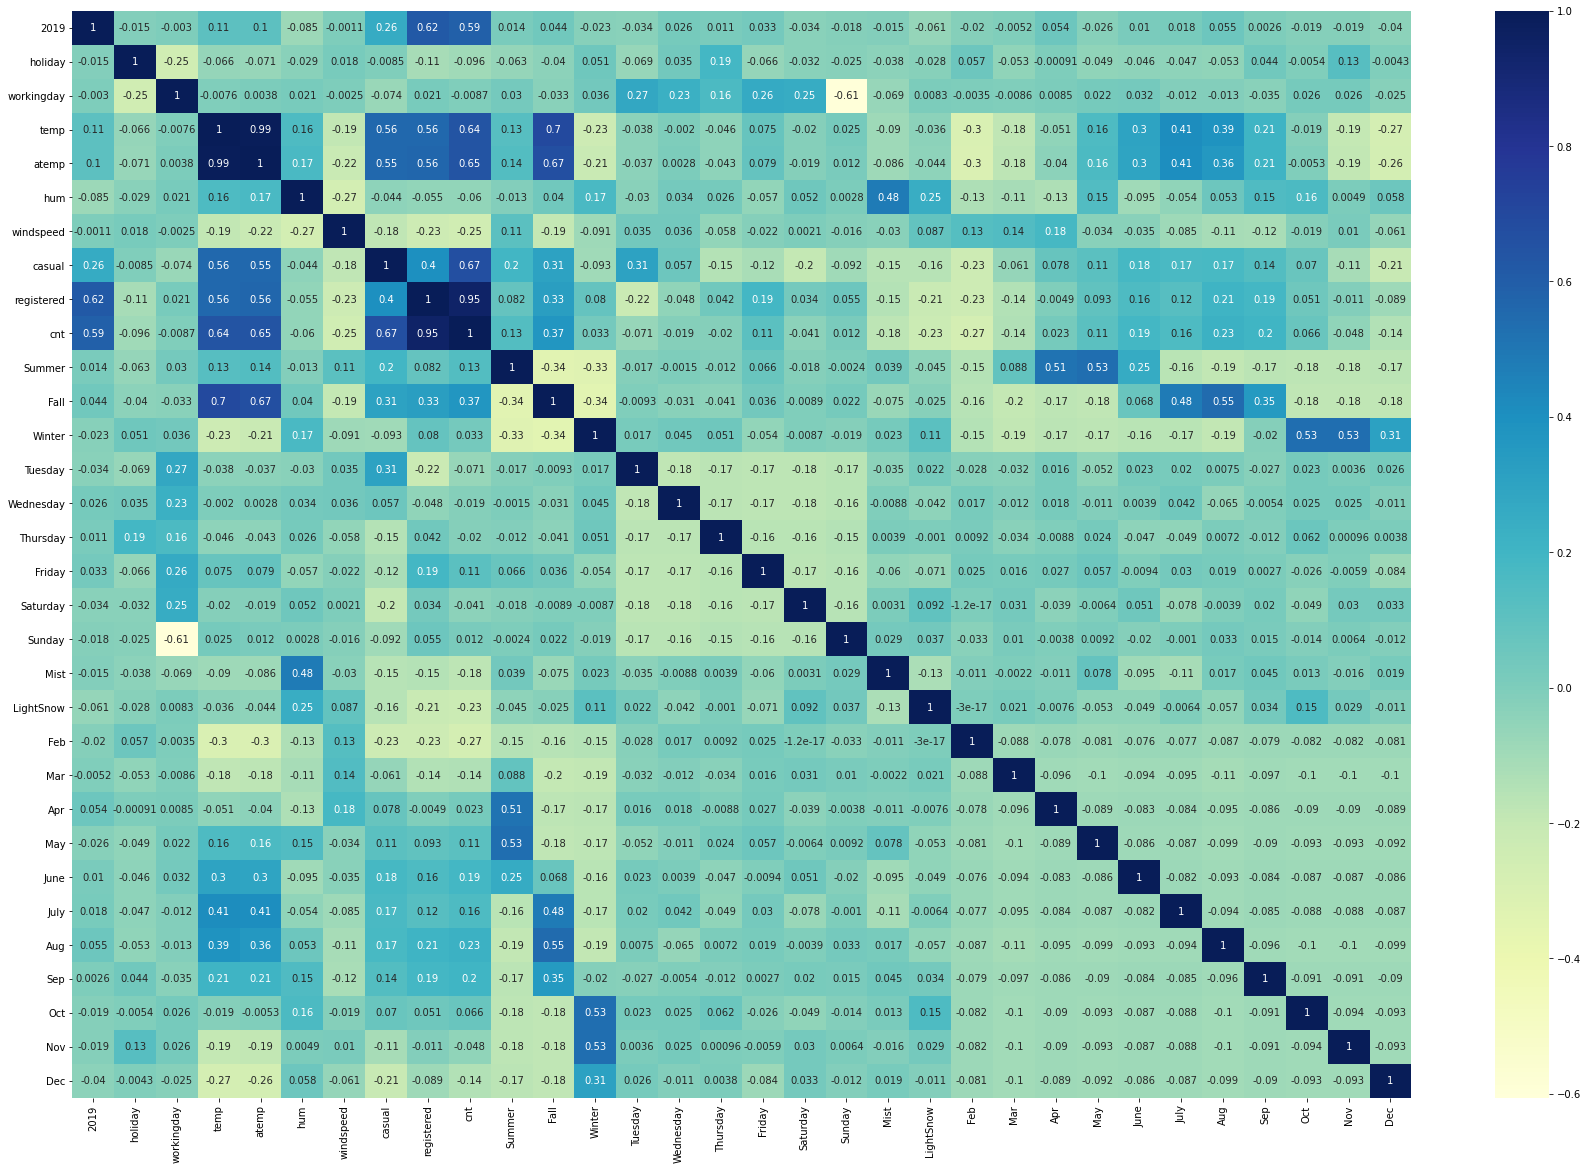

In [31]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

<br>
<br>

## <font color="blue">Step 7: Dividing into X and Y sets for the model building</font>

In [32]:
y_train = df_train.pop('cnt')
X_train = df_train

<br>
<br>

## <font color="blue">Step 8: Building a linear model</font>

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [34]:
lm = LinearRegression()
lm.fit(X_train,y_train)
### selecting top 20 features as per idea from heatmap above
rfe = RFE(lm,20)
rfe = rfe.fit(X_train, y_train)

In [35]:
### checking the list of features as er RFE
list(zip(X_train.columns , rfe.support_,rfe.ranking_))

[('2019', False, 2),
 ('holiday', False, 12),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', False, 3),
 ('casual', True, 1),
 ('registered', True, 1),
 ('Summer', True, 1),
 ('Fall', False, 8),
 ('Winter', True, 1),
 ('Tuesday', True, 1),
 ('Wednesday', True, 1),
 ('Thursday', False, 5),
 ('Friday', True, 1),
 ('Saturday', False, 7),
 ('Sunday', True, 1),
 ('Mist', False, 10),
 ('LightSnow', False, 9),
 ('Feb', True, 1),
 ('Mar', True, 1),
 ('Apr', True, 1),
 ('May', True, 1),
 ('June', True, 1),
 ('July', True, 1),
 ('Aug', True, 1),
 ('Sep', False, 4),
 ('Oct', False, 11),
 ('Nov', True, 1),
 ('Dec', False, 6)]

In [36]:
### selecing the top RFE columns
topRFEcolumns = X_train.columns[rfe.support_]
topRFEcolumns

Index(['workingday', 'temp', 'atemp', 'hum', 'casual', 'registered', 'Summer',
       'Winter', 'Tuesday', 'Wednesday', 'Friday', 'Sunday', 'Feb', 'Mar',
       'Apr', 'May', 'June', 'July', 'Aug', 'Nov'],
      dtype='object')

In [37]:
### creating the linear model with these RFE selected features

import statsmodels.api as sm

In [38]:
## adding constant to the training vars

X_train_sm = sm.add_constant(X_train[topRFEcolumns])

In [39]:
## creating the Linear Model

lm_sm = sm.OLS(y_train , X_train_sm)

lm_model = lm_sm.fit()

In [40]:
### checking the sumary of the Linear Model
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.614e+29
Date:                Thu, 10 Jun 2021   Prob (F-statistic):               0.00
Time:                        15:52:41   Log-Likelihood:                 16828.
No. Observations:                 510   AIC:                        -3.361e+04
Df Residuals:                     489   BIC:                        -3.353e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.816e-17   3.29e-16      0.116      0.908   -6.09e-16    6.85e-16
workingday -7.908e-16   1.78e-16     -4.441      0.000   -1.14e-15   -4.41e-16
temp       -5.551e-17   1.71e-15     -0.032      0.974   -3.42e-15    3.31e-15
atemp      -9.368e-16   1.74e-15     -0.537      0.591   -4.36e-15    2.49e-15
hum           1.9e-16   4.09e-16      0.465      0.642   -6.13e-16    9.93e-16
casual         0.3775   3.99e-16   9.47e+14      0.000       0.377       0.377
registered     0.7968   3.29e-16   2.42e+15      0.000       0.797       0.797
Summer      -4.51e-17    2.6e-16     -0.173      0.863   -5.57e-16    4.66e-16
Winter      7.815e-16   1.85e-16      4.225      0.000    4.18e-16    1.14e-15
Tuesday     9.298e-16   2.04e-16      4.568      0.000     5.3e-16    1.33e-15
Wednesday   1.236e-15   1.71e-16      7.243      0.000    9.01e-16    1.57e-15
Friday       1.41e-15    1.7e-16      8.310      0.000    1.08e-15    1.74e-15
Sunday     -2.155e-16   2.03e-16     -1.061      0.289   -6.15e-16    1.84e-16
Feb         5.931e-16   2.39e-16      2.486      0.013    1.24e-16    1.06e-15
Mar         3.036e-18   2.27e-16      0.013      0.989   -4.43e-16    4.49e-16
Apr        -4.588e-16   3.48e-16     -1.320      0.187   -1.14e-15    2.24e-16
May        -4.658e-16   3.52e-16     -1.322      0.187   -1.16e-15    2.26e-16
June       -4.875e-16   3.25e-16     -1.500      0.134   -1.13e-15    1.51e-16
July       -1.044e-15    2.9e-16     -3.605      0.000   -1.61e-15   -4.75e-16
Aug        -3.158e-16   2.59e-16     -1.220      0.223   -8.24e-16    1.93e-16
Nov         -2.98e-15   2.19e-16    -13.628      0.000   -3.41e-15   -2.55e-15
==============================================================================
Omnibus:                       22.576   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.593
Skew:                           0.536   Prob(JB):                     4.57e-06
Kurtosis:                       3.085   Cond. No.                         84.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
## creating function to calculate VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

def showVIF(data,cols):
    vif = pd.DataFrame()
    vif['Features'] = cols
    vif['VIF'] = [variance_inflation_factor(data[cols].values , i) for i in range(data[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'] ,2)
    vif = vif.sort_values(by ="VIF" , ascending=False)
    return vif

In [42]:
## show VIF
print(showVIF(X_train_sm,topRFEcolumns))

      Features     VIF
1         temp  377.79
2        atemp  355.86
3          hum   13.68
5   registered   12.41
0   workingday    8.15
4       casual    6.48
6       Summer    6.31
15         May    3.99
14         Apr    3.49
7       Winter    3.25
16        June    2.98
18         Aug    2.46
17        July    2.45
8      Tuesday    2.43
11      Sunday    1.94
13         Mar    1.78
9    Wednesday    1.70
10      Friday    1.57
19         Nov    1.55
12         Feb    1.27


<br>

-  ### We will remove the column temp thats having very high VIF from the model & then rebuild the Model

In [43]:
## selecting new list of feature columns
FeatureColumns = ['2019','atemp', 'hum', 'windspeed', 'casual', 'registered',
       'Fall', 'Winter', 'Wednesday', 'Friday', 'Saturday', 'Mist',
       'LightSnow', 'Feb', 'Mar', 'Apr', 'July', 'Aug', 'Dec']

## adding constant to the training vars

X_train_sm = sm.add_constant(X_train[FeatureColumns])

## creating the Linear Model

lm_sm = sm.OLS(y_train , X_train_sm)

lm_model = lm_sm.fit()

### checking the sumary of the Linear Model
print(lm_model.summary())

## check VIF
print('\n',showVIF(X_train_sm,FeatureColumns))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.959e+29
Date:                Thu, 10 Jun 2021   Prob (F-statistic):               0.00
Time:                        15:52:43   Log-Likelihood:                 16646.
No. Observations:                 510   AIC:                        -3.325e+04
Df Residuals:                     490   BIC:                        -3.317e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.037e-16   5.45e-16      0.557      0.5

<br>

-  ### We will remove the column registered thats having very high VIF from the model & then rebuild the Model

In [44]:
## selecting new list of feature columns
FeatureColumns = ['2019','atemp', 'hum', 'windspeed', 'casual',
       'Fall', 'Winter', 'Wednesday', 'Friday', 'Saturday', 'Mist',
       'LightSnow', 'Feb', 'Mar', 'Apr', 'July', 'Aug', 'Dec']

## adding constant to the training vars

X_train_sm = sm.add_constant(X_train[FeatureColumns])

## creating the Linear Model

lm_sm = sm.OLS(y_train , X_train_sm)

lm_model = lm_sm.fit()

### checking the sumary of the Linear Model
print(lm_model.summary())

## check VIF
print('\n',showVIF(X_train_sm,FeatureColumns))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     159.0
Date:                Thu, 10 Jun 2021   Prob (F-statistic):          1.53e-191
Time:                        15:52:44   Log-Likelihood:                 528.44
No. Observations:                 510   AIC:                            -1019.
Df Residuals:                     491   BIC:                            -938.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1795      0.028      6.471      0.0

<br>

-  ### We will remove the column Dec thats having very high P-Value from the model & then rebuild the Model


In [45]:
## selecting new list of feature columns
FeatureColumns = ['2019','atemp', 'hum', 'windspeed', 'casual',
       'Fall', 'Winter', 'Wednesday', 'Friday', 'Saturday', 'Mist',
       'LightSnow', 'Feb', 'Mar', 'Apr', 'July', 'Aug']

## adding constant to the training vars

X_train_sm = sm.add_constant(X_train[FeatureColumns])

## creating the Linear Model

lm_sm = sm.OLS(y_train , X_train_sm)

lm_model = lm_sm.fit()

### checking the sumary of the Linear Model
print(lm_model.summary())

## check VIF
print('\n',showVIF(X_train_sm,FeatureColumns))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     168.7
Date:                Thu, 10 Jun 2021   Prob (F-statistic):          1.19e-192
Time:                        15:52:44   Log-Likelihood:                 528.41
No. Observations:                 510   AIC:                            -1021.
Df Residuals:                     492   BIC:                            -944.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1787      0.027      6.519      0.0

<br>

-  ### We will remove the column Mar thats having very high P-Value from the model & then rebuild the Model


In [46]:
## selecting new list of feature columns
FeatureColumns = ['2019','atemp', 'hum', 'windspeed', 'casual',
       'Fall', 'Winter', 'Wednesday', 'Friday', 'Saturday', 'Mist',
       'LightSnow', 'Feb','Apr', 'July', 'Aug']

## adding constant to the training vars

X_train_sm = sm.add_constant(X_train[FeatureColumns])

## creating the Linear Model

lm_sm = sm.OLS(y_train , X_train_sm)

lm_model = lm_sm.fit()

### checking the sumary of the Linear Model
print(lm_model.summary())

## check VIF
print('\n',showVIF(X_train_sm,FeatureColumns))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     179.5
Date:                Thu, 10 Jun 2021   Prob (F-statistic):          9.38e-194
Time:                        15:52:45   Log-Likelihood:                 528.34
No. Observations:                 510   AIC:                            -1023.
Df Residuals:                     493   BIC:                            -950.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1809      0.027      6.757      0.0

<br>

-  ### We will remove the column Feb thats having very high P-Value from the model & then rebuild the Model


In [47]:
## selecting new list of feature columns
FeatureColumns = ['2019','atemp', 'hum', 'windspeed', 'casual',
       'Fall', 'Winter', 'Wednesday', 'Friday', 'Saturday', 'Mist',
       'LightSnow', 'Apr', 'July', 'Aug']

## adding constant to the training vars

X_train_sm = sm.add_constant(X_train[FeatureColumns])

## creating the Linear Model

lm_sm = sm.OLS(y_train , X_train_sm)

lm_model = lm_sm.fit()

### checking the sumary of the Linear Model
print(lm_model.summary())

## check VIF
print('\n',showVIF(X_train_sm,FeatureColumns))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     191.1
Date:                Thu, 10 Jun 2021   Prob (F-statistic):          1.57e-194
Time:                        15:52:46   Log-Likelihood:                 527.45
No. Observations:                 510   AIC:                            -1023.
Df Residuals:                     494   BIC:                            -955.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1737      0.026      6.624      0.0

<br>

-  ### We will remove the column Wednesday thats having very high P-Value from the model & then rebuild the Model


In [48]:
## selecting new list of feature columns
FeatureColumns = ['2019','atemp', 'hum', 'windspeed', 'casual',
       'Fall', 'Winter', 'Friday', 'Saturday', 'Mist',
       'LightSnow', 'Apr', 'July', 'Aug']

## adding constant to the training vars

X_train_sm = sm.add_constant(X_train[FeatureColumns])

## creating the Linear Model

lm_sm = sm.OLS(y_train , X_train_sm)

lm_model = lm_sm.fit()

### checking the sumary of the Linear Model
print(lm_model.summary())

## check VIF
print('\n',showVIF(X_train_sm,FeatureColumns))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     204.0
Date:                Thu, 10 Jun 2021   Prob (F-statistic):          3.54e-195
Time:                        15:52:47   Log-Likelihood:                 526.21
No. Observations:                 510   AIC:                            -1022.
Df Residuals:                     495   BIC:                            -958.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1736      0.026      6.613      0.0

<br>

-  ### We will remove the column atemp thats having very high VIF from the model & then rebuild the Model


In [49]:
## selecting new list of feature columns
FeatureColumns = ['2019','hum', 'windspeed', 'casual',
       'Fall', 'Winter', 'Friday', 'Saturday', 'Mist',
       'LightSnow', 'Apr', 'July', 'Aug']

## adding constant to the training vars

X_train_sm = sm.add_constant(X_train[FeatureColumns])

## creating the Linear Model

lm_sm = sm.OLS(y_train , X_train_sm)

lm_model = lm_sm.fit()

### checking the sumary of the Linear Model
print(lm_model.summary())

## check VIF
print('\n',showVIF(X_train_sm,FeatureColumns))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     130.4
Date:                Thu, 10 Jun 2021   Prob (F-statistic):          1.24e-150
Time:                        15:52:47   Log-Likelihood:                 417.41
No. Observations:                 510   AIC:                            -806.8
Df Residuals:                     496   BIC:                            -747.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2226      0.032      6.903      0.0

<br>

-  ### We will remove the column hum thats having very high p-Value & VIF from the model & then rebuild the Model


In [50]:
## selecting new list of feature columns
FeatureColumns = ['2019', 'windspeed', 'casual',
       'Fall', 'Winter', 'Friday', 'Saturday', 'Mist',
       'LightSnow', 'Apr', 'July', 'Aug']

## adding constant to the training vars

X_train_sm = sm.add_constant(X_train[FeatureColumns])

## creating the Linear Model

lm_sm = sm.OLS(y_train , X_train_sm)

lm_model = lm_sm.fit()

### checking the sumary of the Linear Model
print(lm_model.summary())

## check VIF
print('\n',showVIF(X_train_sm,FeatureColumns))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     141.2
Date:                Thu, 10 Jun 2021   Prob (F-statistic):          1.79e-151
Time:                        15:52:48   Log-Likelihood:                 416.83
No. Observations:                 510   AIC:                            -807.7
Df Residuals:                     497   BIC:                            -752.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2520      0.017     15.163      0.0

-  ### We will remove the column Aug thats having very high P-Value from the model & then rebuild the Model


In [51]:
## selecting new list of feature columns
FeatureColumns = ['2019', 'windspeed', 'casual',
       'Fall', 'Winter', 'Friday', 'Saturday', 'Mist',
       'LightSnow', 'Apr', 'July']

## adding constant to the training vars

X_train_sm = sm.add_constant(X_train[FeatureColumns])

## creating the Linear Model

lm_sm = sm.OLS(y_train , X_train_sm)

lm_model = lm_sm.fit()

### checking the sumary of the Linear Model
print(lm_model.summary())

## check VIF
print('\n',showVIF(X_train_sm,FeatureColumns))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     154.3
Date:                Thu, 10 Jun 2021   Prob (F-statistic):          1.52e-152
Time:                        15:52:49   Log-Likelihood:                 416.75
No. Observations:                 510   AIC:                            -809.5
Df Residuals:                     498   BIC:                            -758.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2521      0.017     15.180      0.0

<br>

-  ### We will remove the column July thats having very high P-Value from the model & then rebuild the Model


In [52]:
## selecting new list of feature columns
FeatureColumns = ['2019', 'windspeed', 'casual',
       'Fall', 'Winter', 'Friday', 'Saturday', 'Mist',
       'LightSnow', 'Apr']

## adding constant to the training vars

X_train_sm = sm.add_constant(X_train[FeatureColumns])

## creating the Linear Model

lm_sm = sm.OLS(y_train , X_train_sm)

lm_model = lm_sm.fit()

### checking the sumary of the Linear Model
print(lm_model.summary())

## check VIF
print('\n',showVIF(X_train_sm,FeatureColumns))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     169.1
Date:                Thu, 10 Jun 2021   Prob (F-statistic):          3.30e-153
Time:                        15:52:49   Log-Likelihood:                 415.66
No. Observations:                 510   AIC:                            -809.3
Df Residuals:                     499   BIC:                            -762.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2513      0.017     15.122      0.0

<br>
<br>

- ### Finally we have the list of 10 top features that give very good R2 value in the model and none have P-Value > 0.05 and VIF > 5

- ### Features : <font color="green">casual , windspeed , 2019 , Fall, Winter, Mist, Apr, Friday, Saturday, LightSnow </font>

<br>
<br>

## <font color="blue">Step 9: Residual Analysis of the train data</font>

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [53]:
## getting predicted value from the model
y_train_predict = lm_model.predict(X_train_sm)

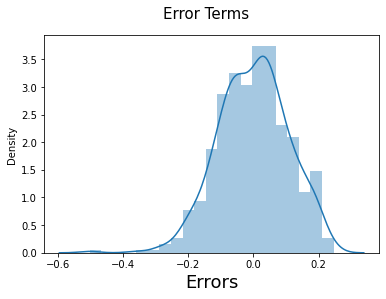

In [54]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_predict))
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Errors', fontsize = 18)  
plt.show()

- ### We can that the error terms of the predicted values from the model on our training data is normally distributed and mean is at 0


<br>
<br>

##  <font color="blue">Step 10: Making Predictions Using the Final Model</font>

#### Applying the scaling on the test sets

In [55]:
df_test[scale_feature] = scaler.fit_transform(df_test[scale_feature])
df_test.head()

,2019,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Summer,Fall,Winter,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Mist,LightSnow,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.898559,0.397068,0.704300,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.253749,0.765284,0.725421,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
299,0,0,0,0.496221,0.492359,0.777843,0.443398,0.067921,0.309888,0.278853,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.257277,0.540237,0.545512,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
152,0,0,0,0.821739,0.749249,0.070765,0.682387,0.213761,0.592639,0.569148,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [56]:
### checking the impact of scaling on the test set
df_test.describe()

,2019,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,Summer,Fall,Winter,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Mist,LightSnow,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.546312,0.530942,0.508750,0.418870,0.254916,0.505149,0.516216,0.264840,0.246575,0.232877,0.118721,0.123288,0.155251,0.141553,0.132420,0.173516,0.319635,0.027397,0.100457,0.054795,0.091324,0.086758,0.095890,0.105023,0.059361,0.086758,0.082192,0.073059,0.086758
std,0.500722,0.188034,0.481313,0.249189,0.228159,0.201253,0.188111,0.209581,0.235390,0.238702,0.442259,0.432005,0.423633,0.324202,0.329520,0.362974,0.349389,0.339723,0.379560,0.467403,0.163612,0.301297,0.228100,0.288730,0.282125,0.295115,0.307285,0.236840,0.282125,0.275286,0.260830,0.282125
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,0.096295,0.323690,0.359882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.547913,0.494200,0.402533,0.213761,0.504523,0.520241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.720622,0.651165,0.524362,0.347251,0.653774,0.682487,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<br>

#### Dividing into X and Y vars from test sets

In [57]:
y_test = df_test.pop('cnt')
X_test = df_test

<br>

#### Adding constant variable to test dataframe

In [58]:
X_test_sm = sm.add_constant(X_test[FeatureColumns])

<br>

#### Making predictions

In [59]:
y_test_predict = lm_model.predict(X_test_sm)

<br>
<br>

## <font color="blue">Step 11: Model Evaluation</font>

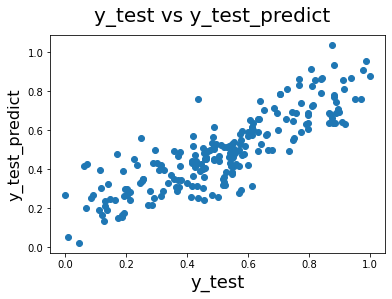

In [60]:
# Plotting y_test and y_test_predict to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_predict)
fig.suptitle('y_test vs y_test_predict', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18) 
plt.ylabel('y_test_predict', fontsize = 16)  
plt.show()

In [61]:
## checking the R2-score of the Test data

from sklearn.metrics import r2_score

r2_score(y_test, y_test_predict)

0.70837442208069

<br>

## <font color="green">We can see that the R2 value of the Train (0.772) and Test (0.708) data is very close . So we can conclude the model is best fit.</font>